散布図、相関図、PCA、箱ヒゲ図（クラス別）

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data=pd.read_table('../data/train.tsv')

In [4]:
data['Y'].head(10)

0    3
1    2
2    1
3    1
4    1
5    3
6    3
7    2
8    1
9    1
Name: Y, dtype: int64

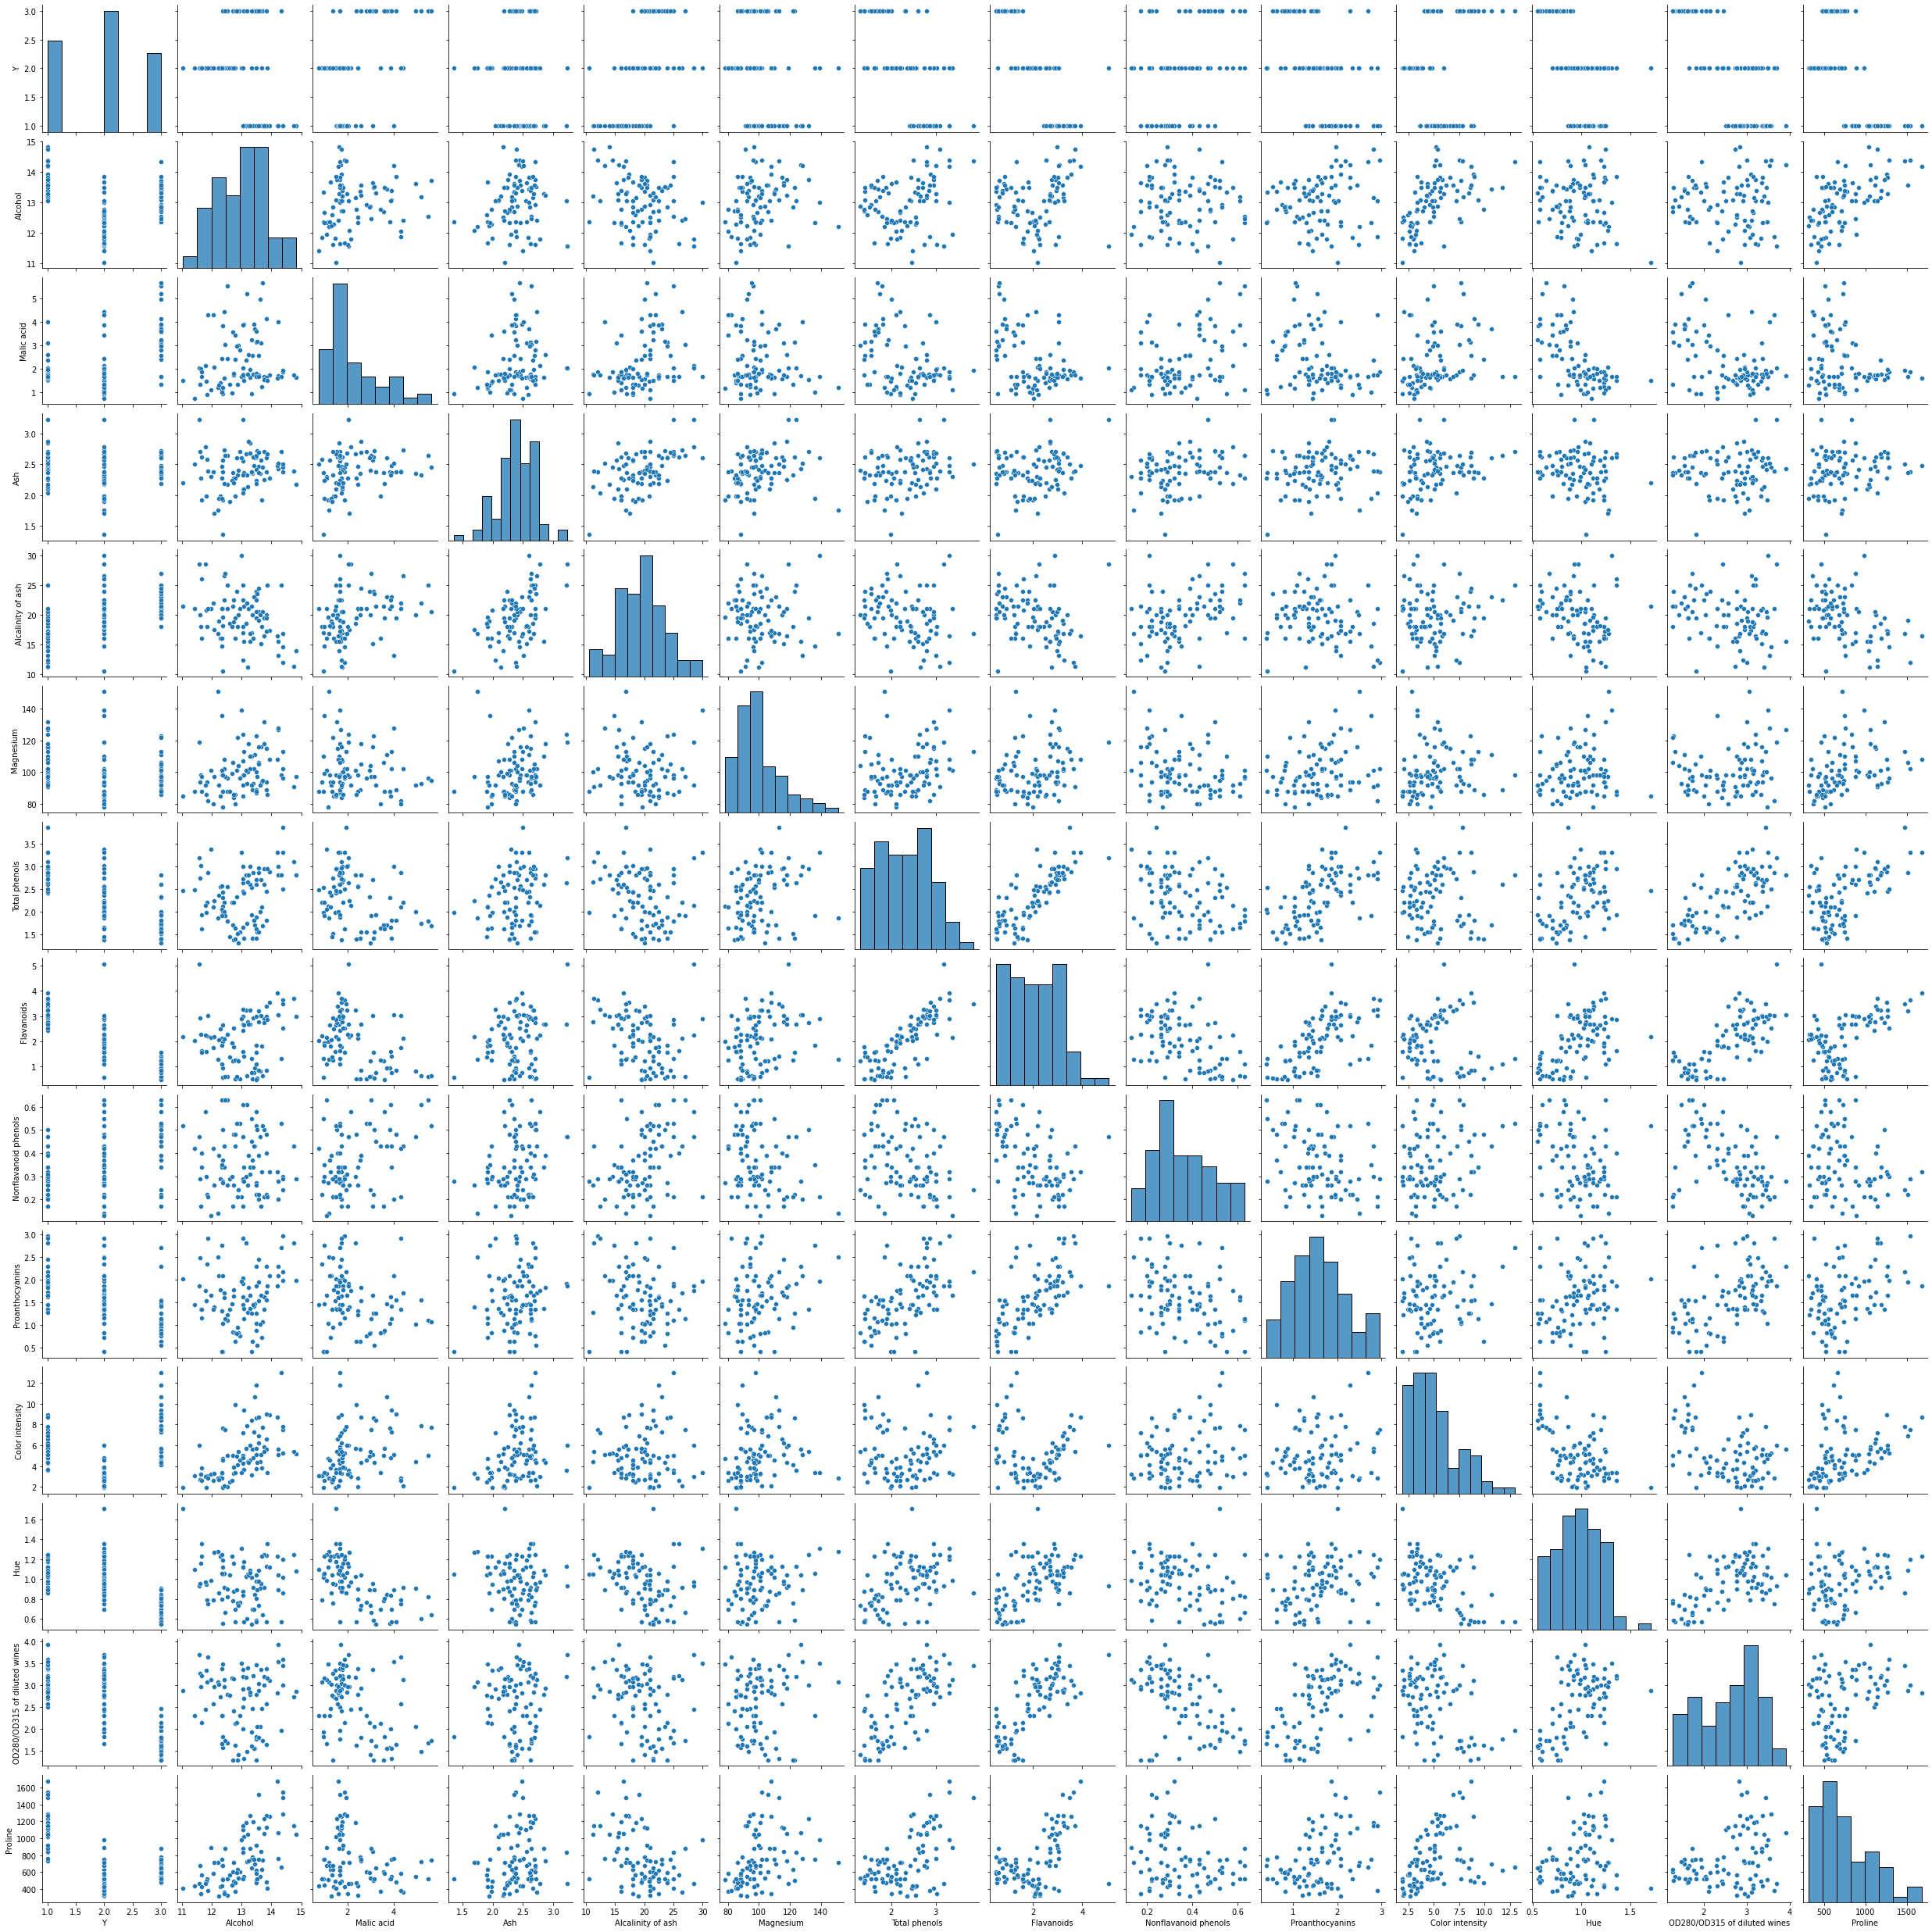

In [8]:
df=data.drop('id',axis=1)
sns.pairplot(df)

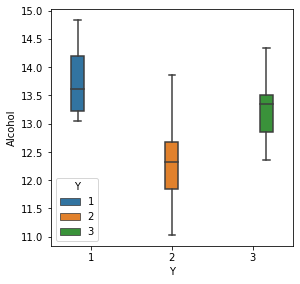

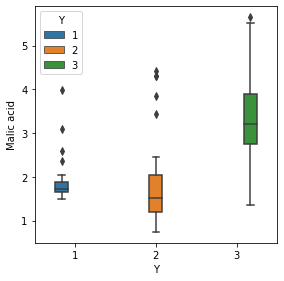

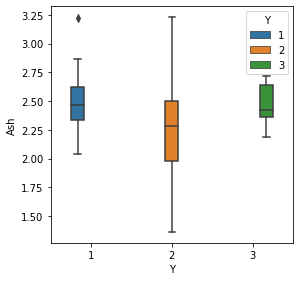

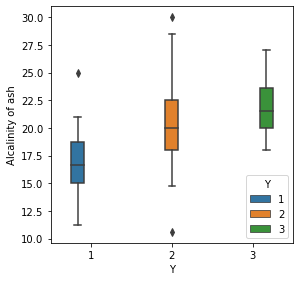

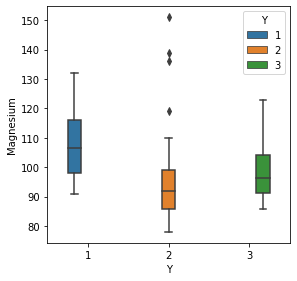

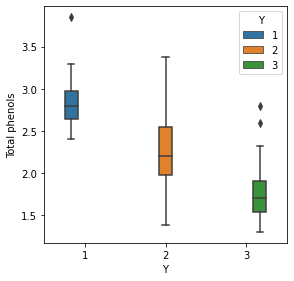

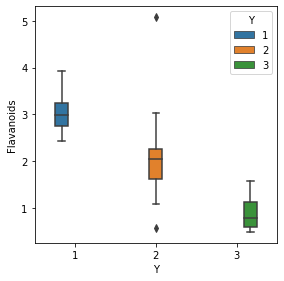

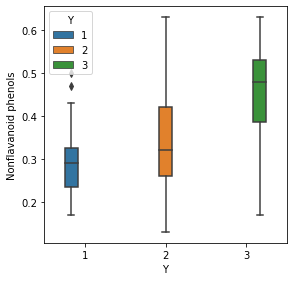

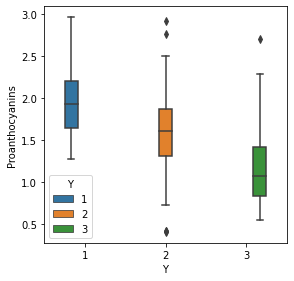

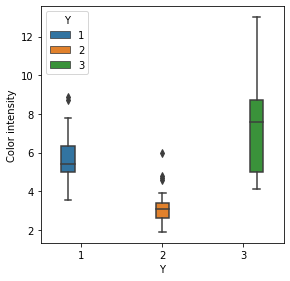

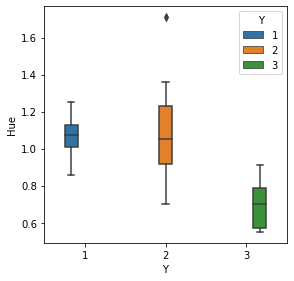

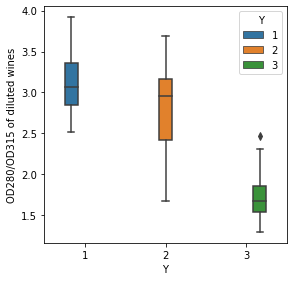

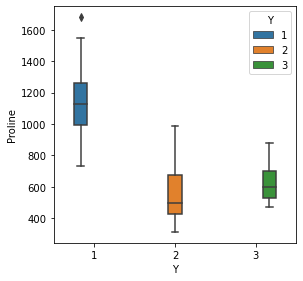

In [36]:
for id,col in enumerate(df.drop('Y',axis=1).columns):
    fig = plt.figure(figsize=(20,20))
    fig.add_subplot(4, 4, id+1)
    sns.boxplot(x='Y', y=col,data=df,width=0.5,hue="Y")
plt.show()

箱ひげず見た感じ外れ値なかった。
調べると、計算量削減のために正規化使うらしい（画像処理とか）
なので、これくらいのデータ数なら標準化で良さげ。


In [53]:
from sklearn.preprocessing import StandardScaler
ms = StandardScaler()
X_data=df.drop('Y',axis=1)
ms.fit(X_data)
X_data_std =pd.DataFrame(ms.transform(X_data),columns=X_data.columns)

In [56]:
import sklearn
from sklearn.decomposition import PCA 
pca=PCA()
pca.fit(X_data_std)
feature = pca.transform(X_data_std)

In [58]:
pd.DataFrame(feature)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-3.173219,0.842044,-0.065713,-0.846564,0.350957,0.223954,-0.035636,-1.203905,0.552278,0.535473,0.078454,-0.155661,0.115890
1,-1.148321,-0.282996,2.753837,-0.126349,0.856805,-1.403187,0.745162,0.408264,-0.136588,0.052103,-0.020957,-0.001771,-0.131578
2,2.017446,-0.079828,-0.467545,-0.301402,0.818753,0.116324,0.087154,-0.582693,-0.257065,0.851961,-0.345427,0.125689,-0.288118
3,1.065284,-0.026498,-0.244806,0.147877,-0.762655,-0.249295,-0.501986,-0.123767,0.520800,-0.805599,-0.147799,-0.357227,-0.085057
4,1.140050,1.183989,3.049416,1.282998,-0.938688,-0.429011,0.331350,0.074488,-0.663268,-0.534311,-0.089094,-0.118242,0.174830
...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,0.921019,-1.420664,-0.160016,-0.785660,0.170476,-0.005781,-0.272580,0.641212,0.235988,-0.278158,-0.047781,0.293006,0.043981
85,-2.863620,1.527147,-0.689779,-0.421722,0.364966,0.490280,-0.384093,-0.209557,0.015266,0.267383,-0.111281,-0.184935,-0.007585
86,2.124282,1.167122,-0.032651,-0.262738,-0.682410,-0.374721,-0.394718,-0.682121,0.610058,-0.501127,-0.091746,-0.028192,0.004819
87,-2.162863,1.961086,0.114943,0.759919,0.142020,0.825911,-0.563269,0.830189,-0.068298,-0.480363,-0.190157,-0.054629,0.228256


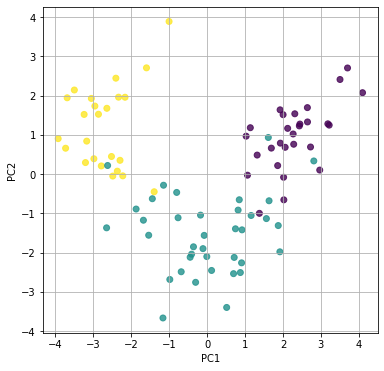

In [61]:
plt.figure(figsize=(6, 6))
plt.scatter(feature[:, 0], feature[:, 1], alpha=0.8, c=list(df.iloc[:, 0]))
plt.grid()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [62]:
pd.DataFrame(pca.explained_variance_ratio_)

,0
0,0.353685
1,0.196851
2,0.126736
3,0.070427
4,0.063435
5,0.046160
6,0.036236
7,0.026559
8,0.021900
9,0.019917
